In [4]:
def find_block(path):
    splits = path.split("/")
    block = splits[1]
    return block

def get_gridsize(primitives):
    nTasksPerBlock = 1024
    nPrimitives = float(primitives[:-1]) * 1000
    return (nPrimitives + (nTasksPerBlock - 1)) // nTasksPerBlock

In [ ]:
f = open("scalability_new.txt", "r")
stages = ["GenerateMortonCodes", "BuildTreeHierarchy", "ComputeBoundingBoxes", "AlgorithmOnly"]
scenes = ["conference", "fairyforest", "sibenik"]
# stages = ["AlgorithmOnly"]
# scenes = ["sibenik"]
lines = f.readlines()
count = 0
for stage in stages:
    for scene in scenes:
        filename = scene + "_" + stage + ".txt"
        print(filename)
        fw = open(filename, "w")
        for line in lines:
            words = line.split()
            keyword = stage + scene
            if keyword in words[0] and "mean" in words[0]:
                fw.write(line)
                count += 1
        print(count)

conference_GenerateMortonCodes.txt
fairyforest_GenerateMortonCodes.txt
sibenik_GenerateMortonCodes.txt
conference_BuildTreeHierarchy.txt
fairyforest_BuildTreeHierarchy.txt
sibenik_BuildTreeHierarchy.txt
conference_ComputeBoundingBoxes.txt
fairyforest_ComputeBoundingBoxes.txt
sibenik_ComputeBoundingBoxes.txt
conference_AlgorithmOnly.txt
fairyforest_AlgorithmOnly.txt
sibenik_AlgorithmOnly.txt


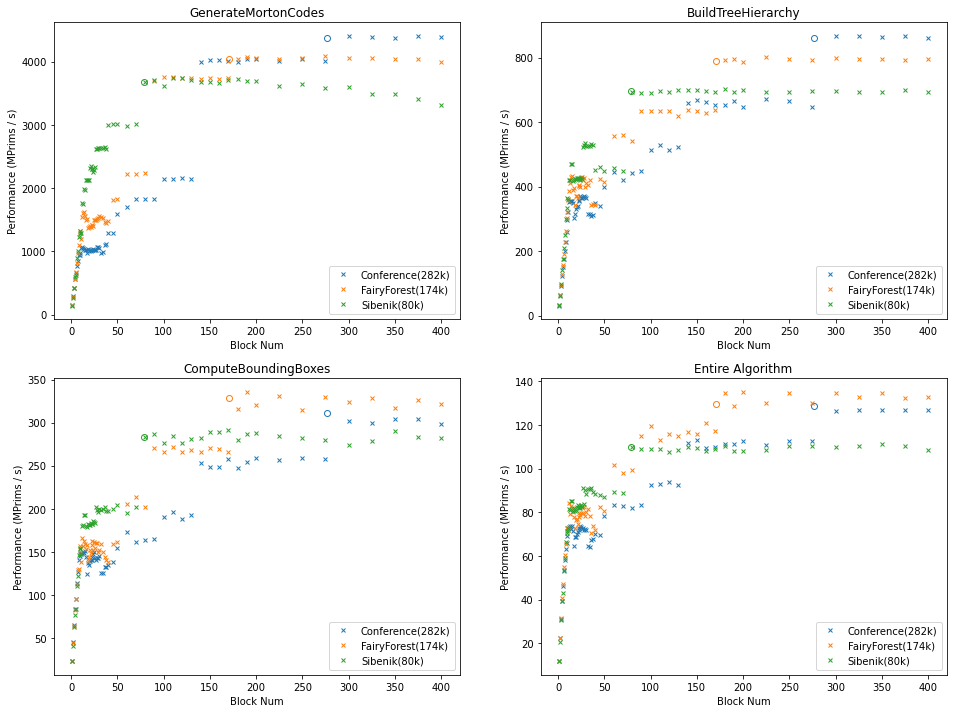

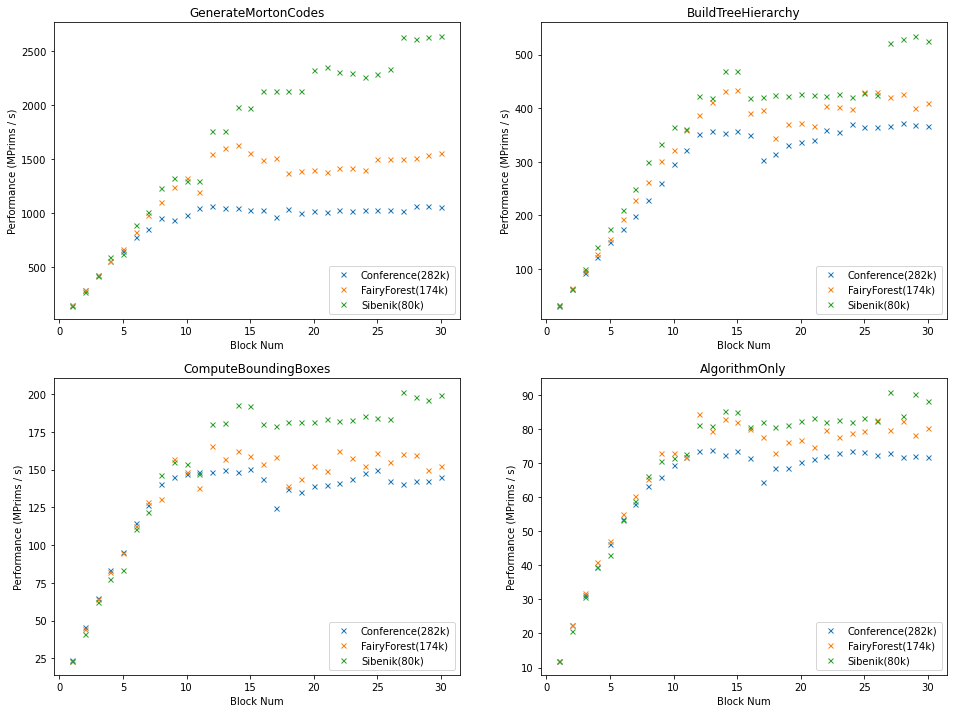

In [39]:
import matplotlib.pyplot as plt
import numpy as np

stages = ["GenerateMortonCodes", "BuildTreeHierarchy", "ComputeBoundingBoxes", "AlgorithmOnly"]
stages_title = ["GenerateMortonCodes", "BuildTreeHierarchy", "ComputeBoundingBoxes", "Entire Algorithm"]
scenes = ["conference", "fairyforest", "sibenik"]
colors = ["blue", "red", "green", "black"]
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), sharey="none")
fig_scale, ax_scale = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), sharey="none")
for i in range(2):
    for j in range(2):
        stageid = i * 2 + j
        ax[i][j].set_title(stages_title[stageid])
        ax[i][j].set(xlabel='Block Num', ylabel='Performance (MPrims / s)')
        ax[i][j].axes.yaxis.set_visible(True)
        ax_scale[i][j].set_title(stages[stageid]) 
        ax_scale[i][j].set(xlabel='Block Num', ylabel='Performance (MPrims / s)')
        ax_scale[i][j].axes.yaxis.set_visible(True)
        handles = []
        handles_scale = []
        for sceneid in range(3):
            x = []
            y = []
            x_small = []
            y_small = []
            filename = scenes[sceneid] + "_" + stages[stageid] + ".txt"
            print(filename)
            f = open(filename, "r")
            lines = f.readlines()
            for line in lines:
                words = line.split()
                block = find_block(words[0])
                x.append(float(block))
                if (float(block) < 0):
                    x[-1] = get_gridsize(words[-2])
                speed = words[-1][:-3]
                if words[-1][-3] == 'G':
                    y.append(float(speed) * 1000)
                else:
                    y.append(float(speed))
                
                if float(block) <= 30 and float(block) >= 0:
                    x_small.append(float(block))
                    if words[-1][-3] == 'G':
                        y_small.append(float(speed) * 1000)
                    else:
                        y_small.append(float(speed))
            
            x0 = np.array(x[-1])
            y0 = np.array(y[-1])
            x = np.array(x[:-1])
            y = np.array(y[:-1])
#             print(x, x0)
#             print(y, y0)
            handle, = ax[i][j].plot(x, y, "x", mew=1, ms=4.5)
            ax[i][j].plot(x0, y0, "o", color = handle.get_color(), markerfacecolor='none', mew=1)
            handles.append(handle)
        
            h, = ax_scale[i][j].plot(x_small, y_small, "x", mew=1, ms=5)
            handles_scale.append(h)
        
#         print(handles)
        ax[i][j].legend(handles=handles, labels = ["Conference(282k)", "FairyForest(174k)", "Sibenik(80k)"], loc='lower right')
        ax_scale[i][j].legend(handles=handles_scale, labels = ["Conference(282k)", "FairyForest(174k)", "Sibenik(80k)"], loc='lower right')
            
plt.show()